In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

(714, 1024, 3)
255


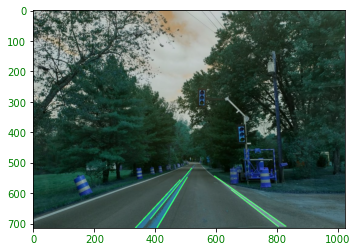

In [3]:
#now define a function to mask everything other than our region
def roi(img,vertices):
    mask = np.zeros_like(img)
    #channel_count = img.shape[2]
    match_mask_color = 255
    print(match_mask_color)
    cv2.fillPoly(mask,vertices,match_mask_color)
    mask_img = cv2.bitwise_and(img, mask)
    return mask_img

def draw_line(img, lines):
    img = np.copy(img)
    line_image = np.zeros((img.shape[0],img.shape[1],3), dtype = np.uint8)
    
    for line in lines:
        for x1,y1,x2,y2 in line:
            cv2.line(line_image,(x1,y1),(x2,y2),(0,255,0),2)
    img = cv2.addWeighted(img,.8, line_image,1,0.0)
    return img

image = cv2.imread('road.jpg')
#img = cv2.resize(img,(600,400))
#image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

#we need to define the region of interest. here the region of interest is triangle shape
print(image.shape)
height = image.shape[0]
width = image.shape[1]

roi_vertices =[
    (200,height),
    (900,height),
    (550,500)
]

#find out the edges
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
edge  = cv2.Canny(gray,100,200)
cropped_image = roi(edge,np.array([roi_vertices],np.int32))

#now draw the line using Hough Line Transform
lines = cv2.HoughLinesP(cropped_image,1,np.pi/180,100,minLineLength=100,maxLineGap=10)

image_line = draw_line(image,lines)


plt.imshow(image_line)
plt.xticks(color='green')
plt.yticks(color='green')
plt.show()

In [37]:
mask = np.zeros_like(image)
color_count = image.shape[2]
make_color = (255,)*color_count
print(make_color)
vertices = [(100,100),
           (200,100),
           (200,300),
            (100,300)
           ]
print(mask.shape)
cv2.fillPoly(mask, np.array([vertices],np.int32), make_color)
mask_image = cv2.bitwise_and(image,mask)

cv2.imshow('Image',mask_image)
cv2.imshow('Mask',mask)
cv2.waitKey(0)
cv2.destroyAllWindows()

(255, 255, 255)
(714, 1024, 3)


### Self Practice

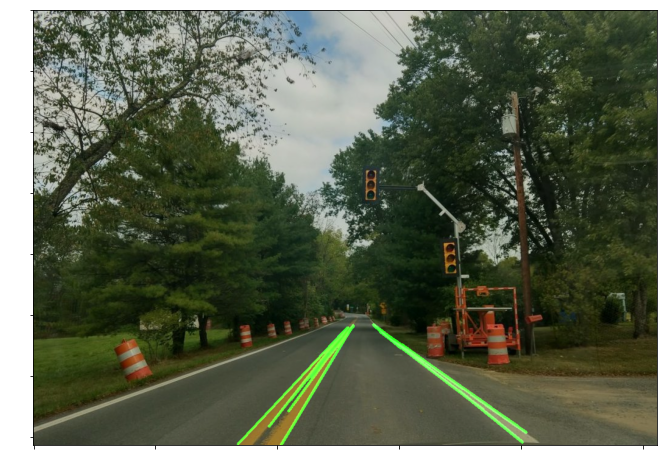

In [62]:
#now define a function which returns the region of interest
def roi(img, vertices):
    mask = np.zeros_like(img)
    #channel_count = img.shape[2]
    make_color_count = 255
    cv2.fillPoly(mask,vertices, make_color_count)
    mask_image = cv2.bitwise_and(img,mask)
    return mask_image

##now define a function to draw lines and return the image
def draw_line(img, lines):
    img = np.copy(img)
    line_image = np.zeros((img.shape[0],img.shape[1], 3), dtype=np.uint8)
    for line in lines:
        for x1,y1,x2,y2 in line:
            cv2.line(line_image, (x1,y1),(x2,y2), (0,253,8),3)
    final_image = cv2.addWeighted(img,.8, line_image,1, 0.0)
    return final_image

#import the image
image = cv2.imread('road.jpg')

#convert into RGB mode
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

###first we need to get the region of interest
#get the image shape, height and width
height = image.shape[0]
width = image.shape[1]
roi_vertices = [
    (0,height),
    (width-100,height),
    (570,500)
]

#now apply canny edge before applying Hough Line Transform.But this will find the edge of the outer periphera of the roi.
#to get rid of this situation we need to first apply canny edge detection then find the roi
gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
canny = cv2.Canny(gray_image, 150, 230)
cropped_image = roi(canny,np.array([roi_vertices],np.int32))

#Now apply Hough Line Transform
lines = cv2.HoughLinesP(cropped_image,6, np.pi/180, 120,lines=np.array([]), minLineLength=40, maxLineGap=30)

road_line = draw_line(image,lines)  

fig = plt.figure(figsize=(12,8))
plt.imshow(road_line)
plt.xticks(color='white')
plt.yticks(color='white')
plt.show()